Возьмите датасет [Mortality and Water Hardness](https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness)

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.

    Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков
Задание 2.

    Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Задание 1

In [2]:
df = pd.read_csv('water.csv')
df.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

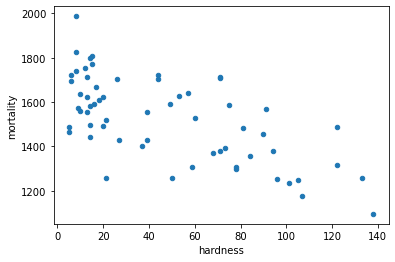

In [3]:
df.plot(kind = 'scatter', 
        x = 'hardness', 
        y = 'mortality')

In [4]:
# коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
#коэффициент корреляции Спирмена
df[['mortality', 'hardness']].corr(method = 'spearman')
# средняя по силе обратная связь, как показывают коэффициенты

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
#модель линейной регрессии
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#коэффициент детерминации
model.score(X_test, y_test)

0.5099679408034544

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# размер train и  test частей

(48, 1) (13, 1) (48,) (13,)


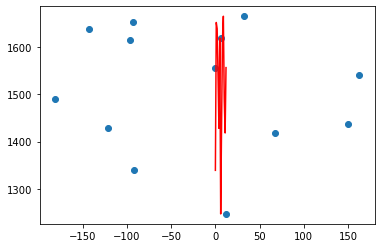

In [8]:
#график остатков
residuals =  y_test - y_pred
plt.scatter(residuals, y_pred)
plt.plot(y_pred, c = 'r')

Судя по графикам и модели регрессии, при увеличении в воде уровня солей, минералов смертность падает, поэтому можно сказать, что связь существует, хоть и является средней по силе.

При разделении данных остается очень мало данных и поэтомк коэффициент деьерминации нестабилен

### Задание 2

In [9]:
north_town = df[df['location'] == 'North']
south_town = df[df['location'] == 'South']

#### Расчеты для северных городов

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

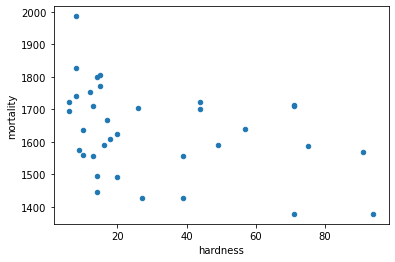

In [10]:
north_town.plot(kind = 'scatter', 
                x = 'hardness', 
                y = 'mortality')

In [11]:
# коэффициент корреляции Пирсона
north_town[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [12]:
#коэффициент корреляции Спирмена
north_town[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [13]:
X = north_town[['hardness']]
y = north_town['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# коэффициент детерминации
model.score(X_test, y_test)

0.032340393386281474

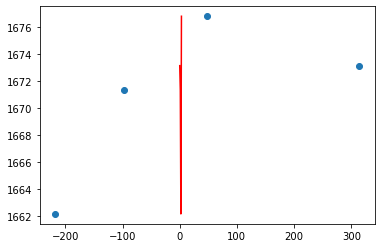

In [14]:
# график остатков
residuals =  y_test - y_pred
plt.scatter(residuals, y_pred)
plt.plot(y_pred, c = 'r')

#### Расчеты для южных городов

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

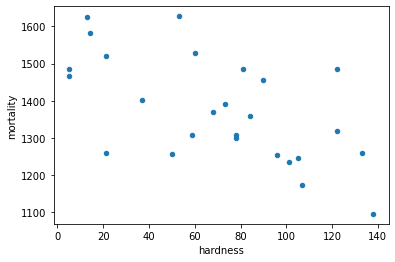

In [15]:
south_town.plot(kind = 'scatter', 
                x = 'hardness', 
                y = 'mortality')

In [16]:
# коэффициент корреляции Пирсона
south_town[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [17]:
# коэффициент корреляции Спирмена
south_town[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [18]:
X = south_town[['hardness']]
y = south_town['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# коэффициент детерминации
model.score(X_test, y_test)

0.7724212353112103

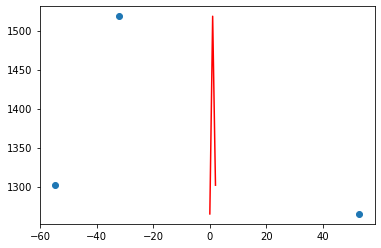

In [19]:
# график остатков
residuals =  y_test - y_pred
plt.scatter(residuals, y_pred)
plt.plot(y_pred, c = 'r')

Связь между южными и северными городами очень слабая, либо ее нет. В северных городах, в большинстве своем, вода мягкая и высокая смертость, 
в южных - факты смертности хаотичны и выглядят как очень слабовзаимосвязаны с жесткостью воды